# Define ML Model

Define the sequential model to be used for inference

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np

In [35]:
# define architecture
model = Sequential()
model.add(Input((64,)))
model.add(Dense(128, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

# load the weights
model.load_weights('models/mnist.weights.h5')

# Load Test Data

Load the testing data digits mnist 

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
digits_data = load_digits() 

x = digits_data.data
y_ = digits_data.target.reshape(-1, 1) # Convert data to a single column

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

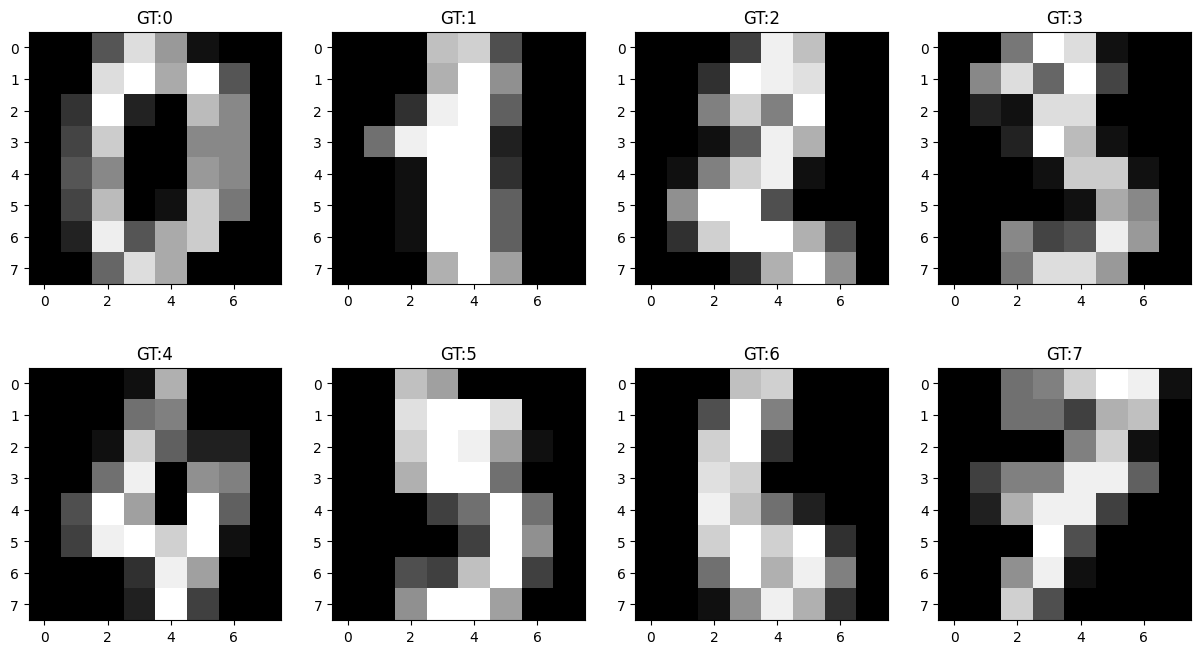

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
k = 4
for i in range(k*2):
    ax[i//k][i%k].set_title(f"GT:{y_[i][0]}")
    ax[i//k][i%k].imshow(x[i].reshape(8,8), cmap='grey')
plt.show()

# RPC Client
Connect to the ZCU104 through custom RPC Server

In [ ]:
from tinyTVM import rpc_client

In [11]:
# connect to zcu board (board portforwarded to 5901 using ssh -L)
usrpc = rpc_client.UltraScaleRPCClient('localhost', 5901) 

In [12]:
# send model to fpga and perform inference on the first 128 instances
y_hw = usrpc.perform_inference(model, test_x[:128])

# Testing
We will perform software inference and validate the FPGA computations

In [13]:
# perform software inference
y_sw = model.predict(test_x[:128],verbose=0)

In [14]:
y_gt = test_y[:128]

In [30]:
# assert software and hardware results
np.testing.assert_array_almost_equal(y_sw, y_hw, 5)

# Sample Outputs
Few samples of inference from FPGA

In [31]:
import matplotlib.pyplot as plt

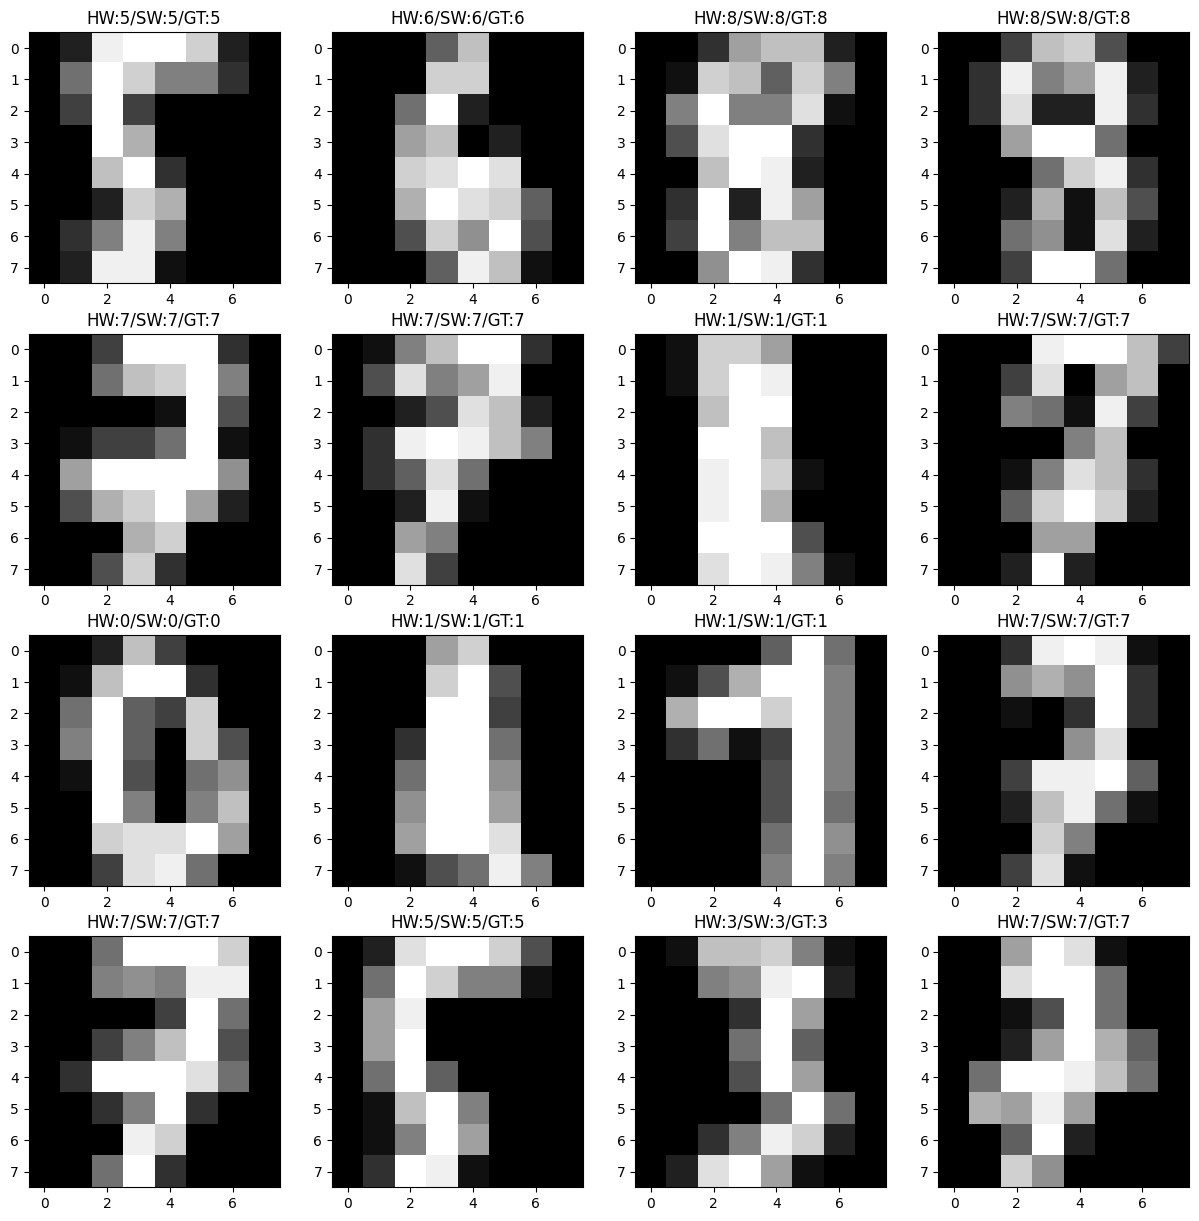

In [32]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
k = 4
for i in range(k*k):
    ax[i//k][i%k].set_title(f"HW:{np.argmax(y_hw[i])}/SW:{np.argmax(y_sw[i])}/GT:{np.argmax(y_gt[i])}")
    ax[i//k][i%k].imshow(test_x[i].reshape(8,8), cmap='grey')
plt.show()